# Bluetooth RSSI - Model evaluation

## Python imports

In [1]:
import numpy as np
import os.path
import matplotlib.pyplot as pyplt
import matplotlib.ticker
import pandas as pd

## Calculate accuracy for all model-test set combinations

In [4]:
MODEL_IDS = [ 'SoftVoting', 'KNN', 'LogisticRegression', 'RandomForest']
MODEL_IDS = [ 'LogisticRegression','LogisticRegression_Pixel','LogisticRegression_Redmi' ]
DATASET_IDS = ['TS', 'PW', 'RW' ]
DATASET_IDS = ['TS',  'PTS', 'RTS', 'PW',  'RW']

results = []
for m_id in MODEL_IDS:
    r = [m_id]
    for d_id in DATASET_IDS:
        df = pd.read_csv('results/hybrid/' + m_id + '_' + d_id + '.tsv', sep='\t')
        score = (df['label'] == df['prediction']).astype(float).mean()
        print(m_id, d_id, score)
        r.append(score)
    results.append(r)
 
#results.append(['BRSSI (RandomForest)', 0.92, 0.85, 0.82 ])
#results.append(['CNN (MobileNetV1)', 0.91, 0.67, 0.79])

plot_data = pd.DataFrame(results, columns=['Model'] + DATASET_IDS)
plot_data

LogisticRegression TS 0.9776833156216791
LogisticRegression PTS 0.9763779527559056
LogisticRegression RTS 0.9792147806004619
LogisticRegression PW 0.859504132231405
LogisticRegression RW 0.9080717488789237
LogisticRegression_Pixel TS 0.900106269925611
LogisticRegression_Pixel PTS 0.9803149606299213
LogisticRegression_Pixel RTS 0.8060046189376443
LogisticRegression_Pixel PW 0.8099173553719008
LogisticRegression_Pixel RW 0.8094170403587444
LogisticRegression_Redmi TS 0.8990435706695006
LogisticRegression_Redmi PTS 0.8248031496062992
LogisticRegression_Redmi RTS 0.9861431870669746
LogisticRegression_Redmi PW 0.6914600550964187
LogisticRegression_Redmi RW 0.8834080717488789


,Model,TS,PTS,RTS,PW,RW
0,LogisticRegression,0.977683,0.976378,0.979215,0.859504,0.908072
1,LogisticRegression_Pixel,0.900106,0.980315,0.806005,0.809917,0.809417
2,LogisticRegression_Redmi,0.899044,0.824803,0.986143,0.691460,0.883408


## Derive plot

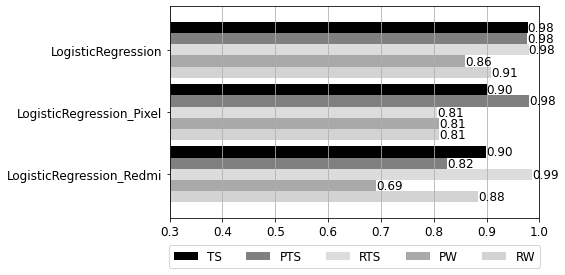

In [14]:
font = {'family' : 'normal',
        'size'   : 12}
pyplt.rc('font', **font)
pyplt.rcParams["figure.figsize"] = (8,4)

plt = plot_data.plot.barh(x='Model',y=DATASET_IDS,color=['black','gray','gainsboro','darkgray','lightgray'],width=0.9)
#plt.legend(loc='lower right',ncol=3)
plt.legend(loc='upper center',ncol=5,bbox_to_anchor=(0.5,-0.1))
#plt.set_xlim([0.65,1.0])
plt.set_xlim([0.3,1.0])
plt.invert_yaxis()
plt.set_ylabel('')
plt.grid(axis='x')
#plt.set_xticklabels(MODELS, rotation=0, ha='center')

for container in plt.containers:
  plt.bar_label(container,fmt='%.2f')
plt.get_figure().tight_layout()
plt.get_figure().savefig('hybrid_model_results.pdf')